In [1]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

/Users/wfy/opt/anaconda3/envs/oral-arg-env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
all_questions_df = pd.read_csv("all_questions.csv")
questions = all_questions_df['question_text'].tolist()
questions = questions[0:100000]
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(questions)

In [15]:
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(embeddings)

centers = kmeans.cluster_centers_
labels = kmeans.labels_

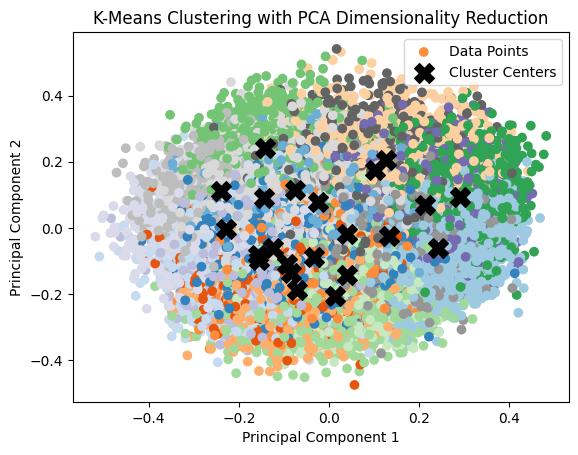

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Dimensionality reduction using PCA
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(embeddings)
reduced_centers = pca.transform(kmeans.cluster_centers_)

# Plot the data in 2D
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='tab20c', label="Data Points")
plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], s=200, c='black', marker='X', label="Cluster Centers")
plt.title("K-Means Clustering with PCA Dimensionality Reduction")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


In [18]:
from sklearn.metrics import silhouette_score
data = embeddings
# Compute silhouette scores for different k values
silhouette_scores = []
for k in range(2, 30):  # Silhouette score is undefined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    score = silhouette_score(data, kmeans.labels_)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.plot(range(2, 30), silhouette_scores, marker='o')
plt.title("Silhouette Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()


KeyboardInterrupt: 

In [16]:
df = pd.DataFrame({'Question': questions, 'Cluster': labels})
df

,Question,Cluster
0,What are the immunities set forth in the Westf...,9
1,"But it seems to me that, quite apart from the ...",9
2,"If we limit it, then Congress would have to re...",10
3,"And that's a -- there's a ceiling, because the...",3
4,"Which would put a lid on the damages, since th...",3
...,...,...
99995,Does the record tell us the scope of the visit...,7
99996,Did you say earlier in your argument that the ...,8
99997,You say that is critical to your case. Was tha...,11
99998,And could you tell me where in your briefs you...,0


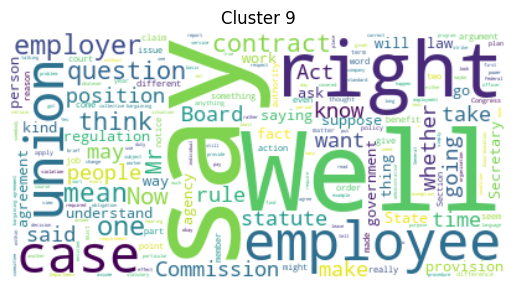

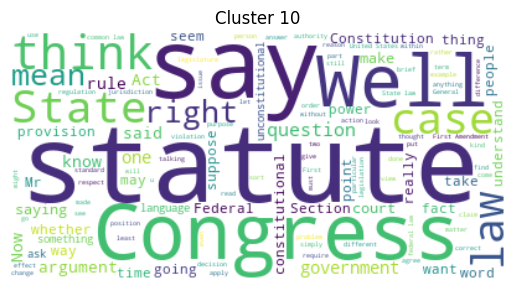

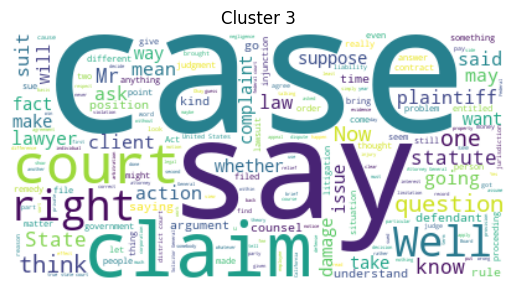

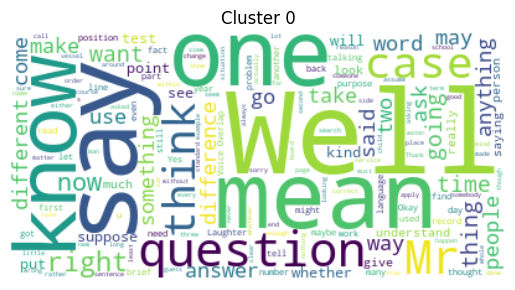

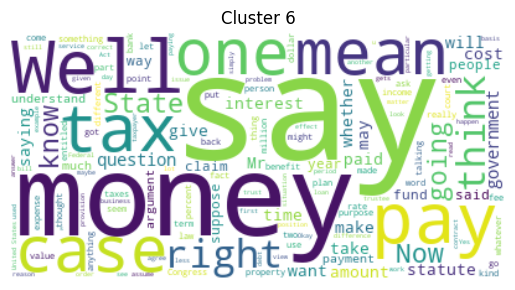

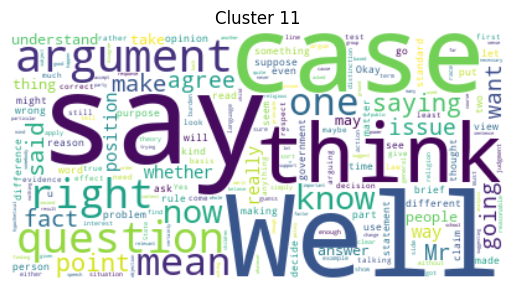

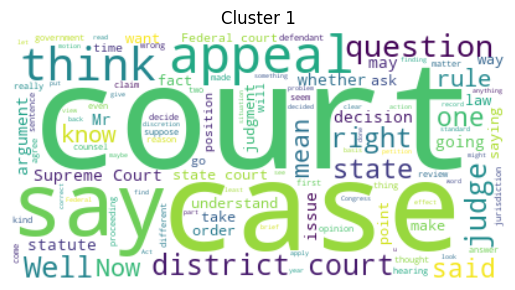

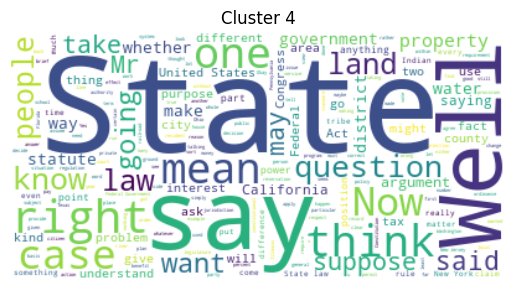

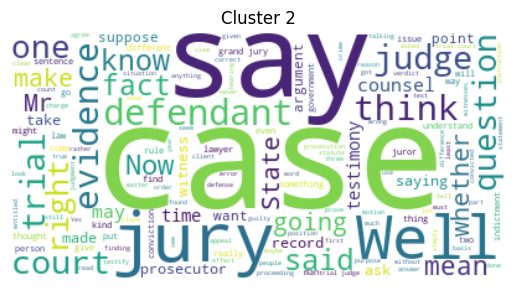

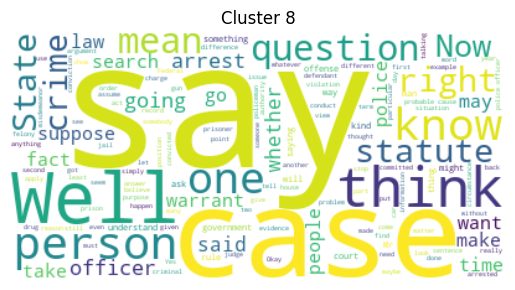

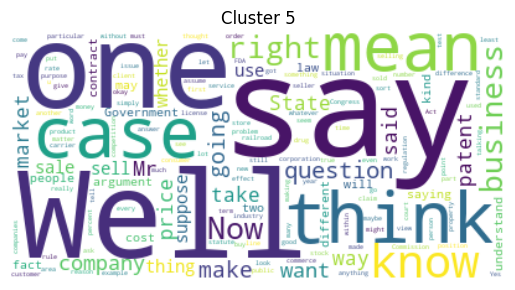

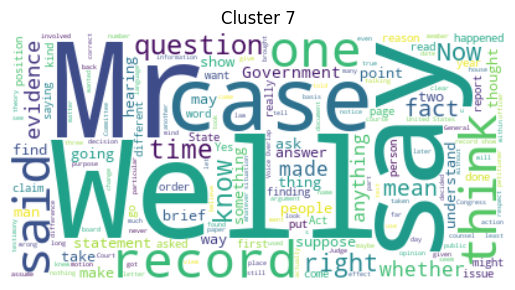

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud for each cluster
for cluster in df['Cluster'].unique():
    cluster_questions = " ".join(df[df['Cluster'] == cluster]['Question'])
    wordcloud = WordCloud(background_color='white').generate(cluster_questions)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Cluster {cluster}")
    plt.show()

In [ ]:
new_question = ["Is it Consitutional?", "Have you considered the Act?"]

embedding = model.encode(new_question)
new_labels = kmeans.predict(embedding)
new_labels

for question, label in zip(new_question, new_labels):
    print(f"Question: '{question}' is assigned to Cluster {label}")